In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [45]:
features = np.array([[1, 0], [0, 2], [1, 1], [1, 2], [1, 3], [2, 2], [2, 3], [3, 2]])
labels = np.array([0,0,0,0,1,1,1,1])

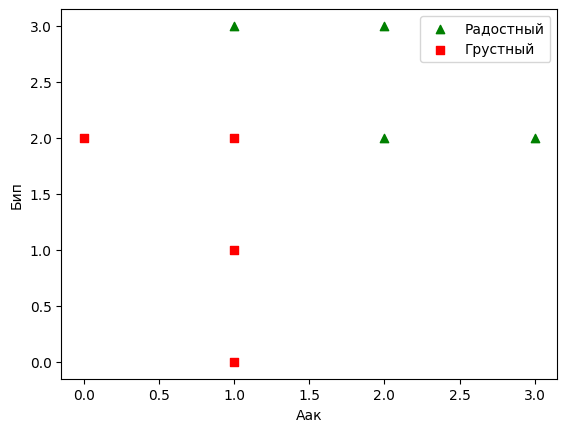

In [46]:
happy = features[np.argwhere(labels==1)]
sad = features[np.argwhere(labels==0)]

plt.scatter([h[0][0] for h in happy],
            [h[0][1] for h in happy],
            marker='^', 
            label='Радостный', 
            c='g')
plt.scatter([s[0][0] for s in sad],
            [s[0][1] for s in sad], 
            marker='s', 
            label='Грустный', 
            c='r')

plt.xlabel('Аак')
plt.ylabel('Бип')

plt.legend(loc='upper right')

In [6]:
import random

In [7]:
def score(weights, bias, features):
    return features.dot(weights) + bias

In [8]:
def step(x):
    if x >= 0:
        return 1
    else:
        return 0

In [49]:
def prediction(weights, bias, features):
    return step(score(weights, bias, features))

In [10]:
def error(weights, bias, features, label):
    pred = prediction(weights, bias, features)
    if pred == label:
        return 0
    else:
        return np.abs(score(weights, bias, features))

In [11]:
def mean_perceptron_error(weights, bias, features, labels):
    total_error = 0
    for i in range(len(features)):
        total_error += error(weights, bias, features[i], labels[i])
    return total_error/len(features)

In [12]:
def perceptron_trick(weights, bias, features, label, learning_rate = 0.01):
    pred = prediction(weights, bias, features)
    for i in range(len(weights)):
        weights[i] += (label-pred)*features[i]*learning_rate
        bias += (label-pred)*learning_rate
    return weights, bias

In [50]:
random.seed(0)
def perceptron_algorithm(features, labels, learning_rate = 0.01, epochs = 200):
    weights = [1.0 for i in range(len(features[0]))]
    bias = 0.0
    errors = []
    x = np.linspace(0, 3, 1000)
    for epoch in range(epochs):
        error = mean_perceptron_error(weights, bias, features, labels)
        plt.plot(x, -((weights[0] * x) / weights[1]) - (bias / weights[1]), color='gray', linestyle='dotted')
        errors.append(error)
        i = random.randint(0, len(features)-1)
        weights, bias = perceptron_trick(weights, bias, features[i], labels[i])
    plt.scatter([h[0][0] for h in happy],
            [h[0][1] for h in happy],
            marker='^', 
            label='Радостный', 
            c='g')
    plt.scatter([s[0][0] for s in sad],
            [s[0][1] for s in sad], 
            marker='s', 
            label='Грустный', 
            c='r')
    plt.xlabel('Аак')
    plt.ylabel('Бип')
    plt.legend(loc='upper right')
    plt.plot(x, -((weights[0] * x) / weights[1]) - (bias / weights[1]))
    plt.show()
    plt.scatter(range(epochs), errors)
    return weights, bias

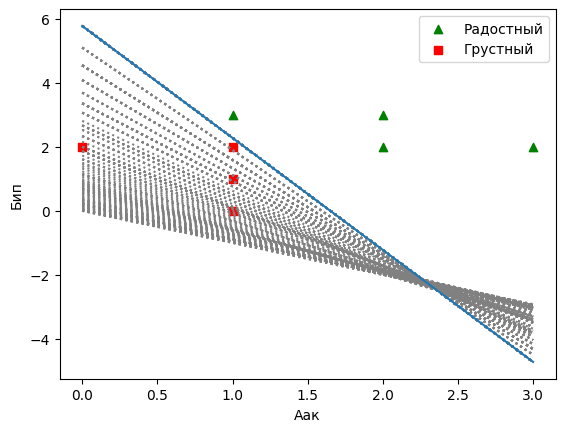

([np.float64(0.6299999999999997), np.float64(0.17999999999999938)],
 np.float64(-1.0400000000000007))

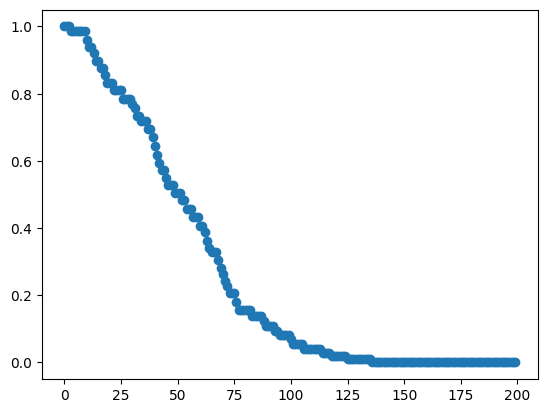

In [51]:
perceptron_algorithm(features, labels)